# Linear Model of Classification

Generally, we consider a hyper-plane to be a decision surface

$$z = \mathbf{w}^T\mathbf{x} + w_0$$

To introduce non-linear component, we can use activation function 
$$y(\mathbf{x}) = f(\mathbf{w}^T\mathbf{x} + w_0)$$

## Discriminant Function
### Two classes

Linear discriminant has the most simple form of 
$$y(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + w_0$$

then the distance from original point to discriminant plane is 
$$\frac{\mathbf{w}^T\mathbf{x}}{||\mathbf{w}||} = -\frac{w_0}{||\mathbf{x}||}$$

and 

$$\mathbf{x} = \mathbf{x}_{\bot} + r\frac{\mathbf{w}}{||\mathbf{w}||}$$

so

$$r = \frac{y(\mathbf{x})}{||\mathbf{w}||}$$

### Multiple classes
There are several ways to extend two classes algorithm to multiple classes:
* Use $K - 1$ classifiers to solve $k - 1$ one-versus-the-rest classification problems
* Use $\frac{K(K - 1)}{2}$ classifiers to solve $\frac{K(K - 1)}{2}$ one-versus-one classification problems.
* Use a K classes discriminant function by using $K$ linear functions of form
$$y_k(\mathbf{x}) = \mathbf{w}^T_k\mathbf{x} + w_{k0}$$

Then if for all $j \ne k$ there is $y_k > y_i$, the $\mathbf{x}$ will be classify to class $C_k$.

Then the hyperplanes has form $$(\mathbf{w}_k - \mathbf{w}_j)^T + (w_{k0} - w_{j0}) = 0$$

There are several ways to learn a discriminant function:
* Least Mean Sum for Classification
* Fisher linear discriminant function
* Perceptron

### Least Mean Sum for Classification

Suppose we describe class $C_k$ by using linear model
$$y_k(\mathbf{x}) = \mathbf{w}^T_k\mathbf{x}_{k0}$$

or

$$\mathbf{y}(\mathbf{x}) = \tilde{\mathbf{W}}^T\tilde{\mathbf{x}}$$

then we have error function

$$E_D(\tilde{\mathbf{W}}) = \frac{1}{2}Tr\{(\tilde{\mathbf{X}}\tilde{\mathbf{W}} - \mathbf{T})^T(\tilde{\mathbf{X}}\tilde{\mathbf{W}} - \mathbf{T})\}$$

so $$\tilde{\mathbf{W}} = (\tilde{\mathbf{X}})^{\dagger}\mathbf{T}$$

then we get the discriminant function
$$\mathbf{y}(\mathbf{x}) = \mathbf{T}^T(\tilde{\mathbf{X}})^{\dagger} \tilde{\mathbf{x}}$$

### Fisher Linear Discriminant function

Consider the occasion of two classes first.

Suppose we have $y = \mathbf{w}^T\mathbf{x}$, let those $x$ that $y \geq -w_0$ to be class $C_1$ and the rest to be $C_2$, then we have $$\mathbf{m}_1 = \frac{1}{N_1}\sum_{n \in C_1}\mathbf{x}_n, \mathbf{m}_2 = \frac{1}{N_2}\sum_{n \in C_2}\mathbf{x}_n$$

then we can measure the extent two classes are seperated by maximizing
$$m_2 - m_1 = \mathbf{w}^T(\mathbf{m}_2 - \mathbf{m}_1)$$

while restraining $||\mathbf{w}|| = 1$. Since by using this method, when the covariance matrix and diagnalized matrix have too much differences, there will be a large overlapping on the projection to the line that connects the means of two classes.

Thus, Fisher brought up the idea to maximize a function to make the gap between two classes larger with make the variance in each class smaller, so that it minimize the overlapping between classes.

Denote the in-class variance by $$s_k^2 = \sum_{n \in C_k}(y_n - m_k)^2$$

define $$J(\mathbf{w}) = \frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}$$

so

$$J(\mathbf{w}) = \frac{\mathbf{w^TS_Bw}}{w^TS_Ww}$$ in which, the between-class covariance matrix is

$$\mathbf{S_B} = (\mathbf{m_2 - m_1})(\mathbf{m_2 - m_1})^T$$

and the within-class covariance matrix is
$$\mathbf{S_W} = \sum_{n \in C_1}(\mathbf{m_n - m_1})(\mathbf{m_n - m_1})^T + \sum_{n \in C_2}(\mathbf{m_n - m_2})(\mathbf{m_n - m_2})^T$$

then by calculating the derivative respect to $\mathbf{w}$, we get 
$$(\mathbf{w^TS_Bw})\mathbf{S_Ww} = (\mathbf{w^TS_Ww})\mathbf{S_Bw}$$

which gives
$$\mathbf{w} \propto \mathbf{S}_W^{-1}(\mathbf{w}_2 - \mathbf{w}_1)$$

### Perceptron

Consider a nonlinear activation function
$$f(a) = 
\begin{cases}
    +1 & a \geq 0\\
    -1 & a < 0
\end{cases}$$

that maps $\mathbf{w}^T\phi(\mathbf{x})$ to $\{-1, +1\}$.

So we can define a error function $$E_P(\mathbf{w}) = -\sum_{n \in \mathcal{M}}\mathbf{w}^T\phi_nt_n$$

so that we can use SGD to minimize the error function by

$$\mathbf{w}^{\tau + 1} = \mathbf{w}^{\tau} - \eta\nabla E_P(\mathbf{w}) = \mathbf{w}^{\tau} - \eta\phi_nt_n$$

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
def f(x, y):
    return x ** 3 + 10 * x ** 2 + 5 * y ** 2 + 5 * x * y

def delta(x, y):
    return np.array([3 * x ** 2 + 20 * x + 5 * y, 10 * y + 5 * x])

alpha = 0.085
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X,Y = np.meshgrid(x, y)
plt.contour(X, Y, f(X, Y), 40, alpha=1)
#plt.clabel(C, inline=True, fontsize=10)
plt.xticks(())
plt.yticks(())
plt.axes().set_aspect('equal')

initX = 2
initY = 7
init = np.array([initX, initY])
path = []
path.append(init)
oldinit = init.copy()
delta0 = delta(oldinit[0], oldinit[1])
while la.norm(delta0) >= 1e-6:
    newinit = oldinit - alpha * delta(oldinit[0], oldinit[1])
    path.append(newinit)
    plt.plot(np.array([oldinit[0], newinit[0]]), np.array([oldinit[1], newinit[1]]), 'b-')
    oldinit = newinit.copy()
    delta0 = delta(oldinit[0], oldinit[1])
    
for p in path:
    plt.plot(p[0], p[1], 'b-')
print(len(path))

## Probabilistic Generative Model

Consider the problem of two classes first. Then the posterior probability of class $C_1$ is 

$$p(C_1 \mid \mathbf{x}) = \frac{p(\mathbf{x} \mid C_1)}{p(\mathbf{x} \mid C_1)p(C_1) + p(\mathbf{x} \mid C_2)p(C_2)} = \frac{1}{1 + \exp(-a)} = \sigma(a)$$

in which, $$a = \ln \frac{p(\mathbf{x} \mid C_1)p(C_1)}{p(\mathbf{x} \mid C_2)p(C_2)}$$

and we have **Logistic Sigmoid Function:** 
$$\sigma(a) = \frac{1}{1 + \exp(-a)}$$

it is easy to prove that:

* $\sigma(-a) = 1 - \sigma(a)$
* Logistic Sigmoid Function's inverse function is **logit function**:
$$a = \ln \left(\frac{\sigma}{1 - \sigma}\right)$$

For occasion of $K > 2$ classes we have **softmax function**:
$$p(C_k \mid \mathbf{x}) = \frac{p(\mathbf{x} \mid C_k)p(C_k)}{\sum_{j}p(\mathbf{x} \mid C_j)p(C_j)} = \frac{\exp(a_k)}{\sum_j \exp(a_j)}$$



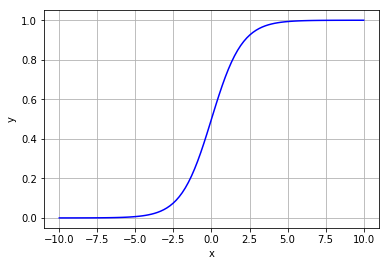

In [16]:
x = np.linspace(-10, 10, 100)
def sigmoid(x):
    return 1/(1 + np.exp(-x))
y = sigmoid(x)
plt.grid()
plt.plot(x, y, 'b')
plt.xlabel('x')
plt.ylabel('y')

Suppose there are two classes under Gaussian-like distribution, and $p(C_1) = \pi$ and $p(C_2) = 1 - \pi$, so
$$p(\mathbf{x}_n, C_1) = p(C_1)p(\mathbf{x}_n \mid C_1) = \pi\mathcal{N}(\mathbf{x}_n \mid \mu_1, \Sigma)$$

$$p(\mathbf{x}_n, C_2) = p(C_2)p(\mathbf{x}_n \mid C_2) = (1 - \pi)\mathcal{N}(\mathbf{x}_n \mid \mu_2, \Sigma)$$

so the likelihood function is $$p(\mathbf{t, X} \mid \pi, \mu_1, \mu_2, \Sigma) = \prod_{n = 1}^N [\pi\mathcal{N}(\mathbf{x}_n \mid \mu_1, \Sigma)]^{t_n}[(1 - \pi)\mathcal{N}(\mathbf{x}_n \mid \mu_2, \Sigma)]^{1 - t_n}$$

then we want to maximize the part of logit likelihood function that is relavant to $\pi$, which is

$$\sum_{n = 1}^N \{t_n\ln\pi + (1 - t_n)\ln(1 - \pi)\}$$

so we get $$\pi = \frac{1}{N}\sum_{n = 1}^N t_n = \frac{N_1}{N_1 + N_2}$$

or maximize $$\sum_{n = 1}^N t_n \ln \mathcal{N}(\mathbf{x}_n \mid \mathbf{\mu}_1, Sigma) = \frac{1}{2}\sum_{n = 1}^Nt_n(\mathbf{x}_n - \mathbf{\mu}_1)^T\Sigma^{-1}(\mathbf{x}_n - \mathbf{\mu}_1)$$ respect to $mu_1$, so we get

$$\mu_1 = \frac{1}{N_1}\sum_{n = 1}^N t_n\mathbf{x}_n$$

Similarly,

$$\mu_2 = \frac{1}{N_2}\sum_{n = 1}^N t_n\mathbf{x}_n$$

or when we want to maximize $$-\frac{N}{2}\ln|\Sigma| - \frac{N}{2}Tr\{\Sigma^{-1}\mathbf{S}\}$$

in which $$\mathbf{S} = \frac{N_1}{N}\mathbf{S_1} + \frac{N_2}{N}\mathbf{S_2}$$

that $$\mathbf{S}_k = \frac{1}{N_k} \sum_{n \in C_k}(\mathbf{x}_n - \mu_k)(\mathbf{x}_n - \mu_k)^T$$

so $\Sigma = S$.

## Probabilistic Discriminative Model

### Logistic Regression

If we have dataset $t_n, \phi_n$, with likelihood function $$p(\mathbf{t \mid w}) = \prod_{n = 1}^N y_n^{t_n}\{1 - y_n\}^{1 - t_n}$$

so by taking the logits, we have **cross-entropy error function**
$$E(\mathbf{w}) = -\sum_{n = 1}^N \{t_n\ln y_n + (1 - t_n)\ln (1 - y_n)\}$$

in which, $$y_n = \sigma(\mathbf{w}^T\phi_n)$$

so that $$\nabla E(\mathbf{w}) = \sum_{n = 1}^N (y_n - t_n)\phi_n$$

In [4]:
import pandas as pd
import numpy as np


In [5]:
df = pd.DataFrame(np.arange(16).reshape(4,4))

In [6]:
df.T

,0,1,2,3
0,0,4,8,12
1,1,5,9,13
2,2,6,10,14
3,3,7,11,15
